
# <font color= Navy Blue > Name: Krishna Barfiwala  </font> #

# <font color= Navy Blue > Task 2: Prediction using Unsupervised ML (Clustering) </font> #

# <font color= Navy Blue > Details: Predicting the optimum number of clusters </font> #

### <font color= Orange > Importing Libraries </font> ###

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

### <font color= Orange > Importing the data </font> ###

In [2]:
#importing dataset
df1 = datasets.load_iris()
print ('Data is imported sucessfully')

Data is imported sucessfully


In [3]:
df= pd.DataFrame( df1.data, columns= df1.feature_names)

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#Gives the correlation matrix
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [6]:
#Gives total number of unique values for each column
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [7]:
df['sepal length (cm)'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

### <font color= Orange > Some visualization </font> ###


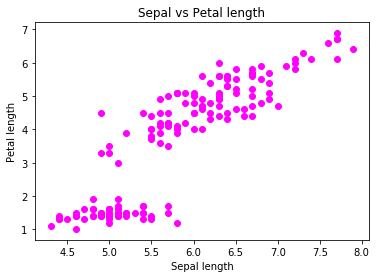

In [8]:
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c= 'magenta')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Sepal vs Petal length')
plt.show()

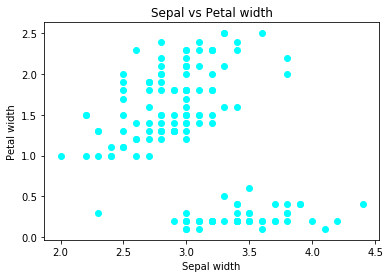

In [9]:
plt.scatter(df['sepal width (cm)'], df['petal width (cm)'], c='aqua')
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.title('Sepal vs Petal width')
plt.show()

### <font color= Orange > Histogram for Sepal Length  </font> ###

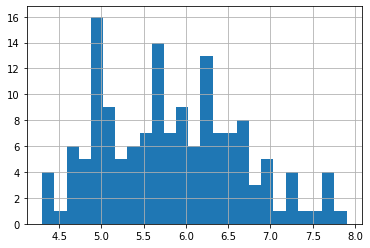

In [10]:
df['sepal length (cm)'].hist(bins=25)

### <font color= Orange > Histogram for Sepal Width  </font> ###

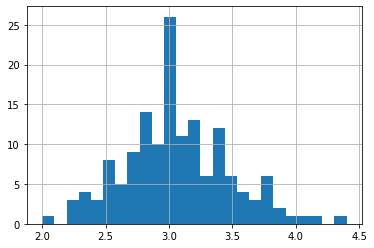

In [11]:
df['sepal width (cm)'].hist(bins=25)

### <font color= Orange > Histogram for Petal Length  </font> ###

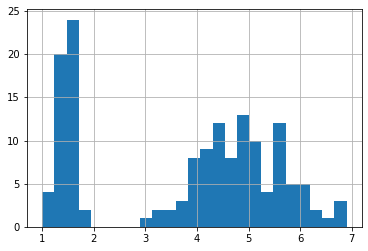

In [12]:
df['petal length (cm)'].hist(bins=25)

### <font color= Orange > Histogram for Petal Width  </font> ###

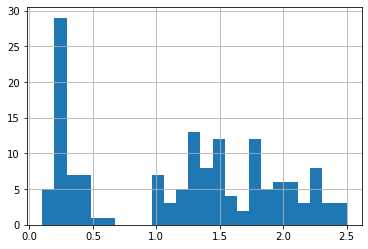

In [13]:
df['petal width (cm)'].hist(bins=25)

### <font color= Orange > Using the elbow method to find the optimal number of clusters  </font> ###

In [14]:
x = df.iloc[:, :].values

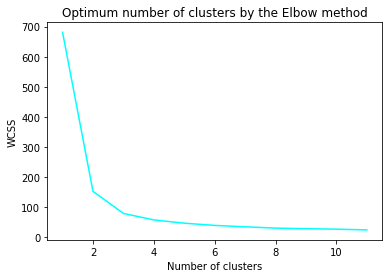

In [15]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,12):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot( range(1,12), wcss, c='aqua')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Optimum number of clusters by the Elbow method')
plt.show()

### The above 'Elbow method' gives the number of clusters. The optimum number of clusters is the point where the elbow curve does not drastically reduce, i.e. where the wcss does not remarkably reduce. 

### Hence the opitmum number of clusters is 3 <font color= Green >  </font> ###


### <font color= Orange > Training the model on the dataset  </font> ###  

In [16]:
kmeans= KMeans( n_clusters= 3, random_state=42)
predicted_y= kmeans.fit_predict(x)

### <font color= Orange > Plotting the KMeans Clusters  </font> ###   

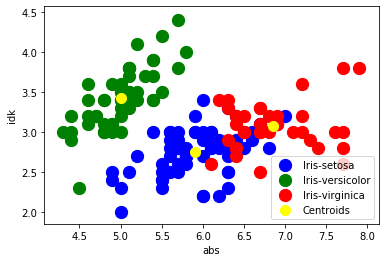

In [17]:
plt.scatter(x[predicted_y==0 ,0], x[predicted_y==0 ,1], s= 150, c='Blue', label='Iris-setosa')
plt.scatter(x[predicted_y==1 ,0], x[predicted_y==1 ,1], s= 150, c='Green', label='Iris-versicolor')
plt.scatter(x[predicted_y==2 ,0], x[predicted_y==2 ,1], s= 150, c='Red', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 102, c = 'yellow', label = 'Centroids')
plt.xlabel('abs')
plt.ylabel('idk')
plt.legend()